<h1 style="color:##3636ff;">Спецификация к типовому расчету</h1>
# "Процедуры, функции, модули"
## по дисциплине «Программирование»
# 1 семестр
# (Вариант 22)
## Абстракция А0
### 1. Постановка задачи.
#### Задание:
Написать программу обработки двух матриц в соответствии с условием.

#### Условие:
Дана матрица  $A$  из  $N$  строк и  $N$  столбцов.

Кроме матрицы  $A$  дана матрица  $B$  такого же размера.

Если каждый элемент матрицы  $A$  больше соответствующего элемента матрицы  $B$,

присвоить элементам  $C_1,C_2,...,C_N$  значения по правилу:

$\displaystyle{C_i = \sum_{k=1}^{N} (A_{ik} + B_{ik}) \ (*)}$

### 2. Уточненная постановка задачи.
Дана две квадратные матрицы $A$ и $B$, состоящие из N строк и N столбцов. 

Сравнить соответствующие элементы матриц $A$ и $B$.

Если $A_{ij} > B_{ij}, \forall i, j: 0 < i < N+1, 0 < j < N+1$, то

сформирмировать одномерный массив $C_1, C_2, ..., C_N$  по правилу $(*)$.

### 3. Пример с иллюстрацией.

In [198]:
A = random_matrix(ZZ,5,x=0,y=100)
B = random_matrix(ZZ,5,x=-100,y=0)
with open('AB_SC_0.txt', 'w') as f:
    for i in range(A.nrows()):
        f.write('[' + str(A[i]).replace(',','')[1:-1] + ']\n')
    for i in range(B.nrows()):
        f.write('[' + str(B[i]).replace(',','')[1:-1] + ']\n')
C = [[A[i,j] > B[i,j] for i in range(A.nrows())] for j in range(A.ncols())]
C

[[True, True, True, True, True],
 [True, True, True, True, True],
 [True, True, True, True, True],
 [True, True, True, True, True],
 [True, True, True, True, True]]

In [233]:
def read_txt(fin):
    with open(fin, 'r') as f:
        Y = f.readlines()
    Y = [x[1:-2].split() for x in Y]
    Y = [[int(x) for x in Y[i]] for i in range(len(Y))]
    return Matrix(Y[:int(len(Y)/2)]), Matrix(Y[int(len(Y)/2):])

print(20*' ' + 'Лаб.12 Типовой Расчет \n' + 50*'=')

fin = input('Input Text File: ')
fout = input('Output Text File: ')

A, B = read_txt(fin)

print('\nИсходная матрица A: \n' + 50*'=' + '\n')
print(A)
print('\nИсходная матрица B: \n' + 50*'=' + '\n')
print(B)

if (A.nrows() == A.ncols() == B.nrows() == B.ncols()) and (A.nrows <> 0):
    if A > B:
        C = sum(A.T) + sum(B.T)
        print('\nСформированный массив C: \n' + 50*'=' + '\n')
        print(C)
    else:
        print('Не все элементы матрицы A больше соответствующих элементов матрицы B')
else:
    print('Некорректное число строк или столбцов')
    
def write_txt(fout, A, B, C):
    with open(fout, 'w') as f:
        for i in range(A.nrows()):
            f.write('[' + str(A[i]).replace(',','')[1:-1] + ']\n')
        for i in range(B.nrows()):
            f.write('[' + str(B[i]).replace(',','')[1:-1] + ']\n')
        f.write('[' + str(C).replace(',','')[1:-1] + ']')
        
write_txt(fout, A, B, C)

                    Лаб.12 Типовой Расчет 
Input Text File: 'AB_SC_0.txt'
Output Text File: 'ABC_SC_0.txt'

Исходная матрица A: 

[41 82 20 64 15]
[42 19  3 30 92]
[39 43 53 30 45]
[26 86 38 18 54]
[41 75 88 37 29]

Исходная матрица B: 

[-11 -78 -66 -95 -78]
[-69  -5 -51 -68 -88]
[-60 -56 -17 -10 -99]
[-12 -30 -76 -32 -44]
[ -7 -77 -44 -10  -3]

Сформированный массив C: 

(-106, -95, -32, 28, 129)


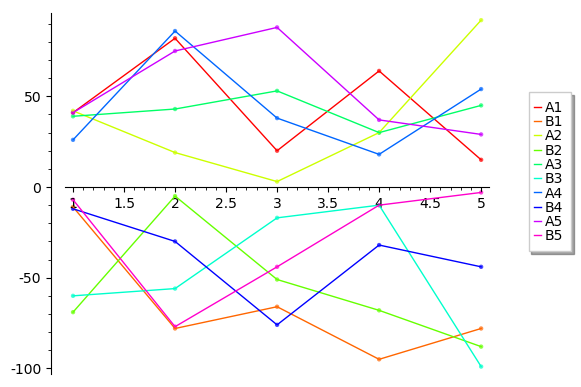

In [234]:
a = [[(j+1, A[i,j]) for j in range(5)] for i in range(5)]
b = [[(j+1, B[i,j]) for j in range(5)] for i in range(5)]
g = Graphics()
for i in range(5):
    p1 = points(a[i], color=hue(3*i/15), alpha=0.7)
    p2 = line2d(a[i], color=hue(3*i/15), legend_label='A{}'.format(i+1))
    p3 = points(b[i], color=hue((3*i+1)/15), alpha=0.7)
    p4 = line2d(b[i], color=hue((3*i+1)/15), legend_label='B{}'.format(i+1))
    g = g + p1 + p2 + p3 + p4
g.set_legend_options(bbox_to_anchor=(1.1, 0.1, 0.11, 0.7))    
g.show()

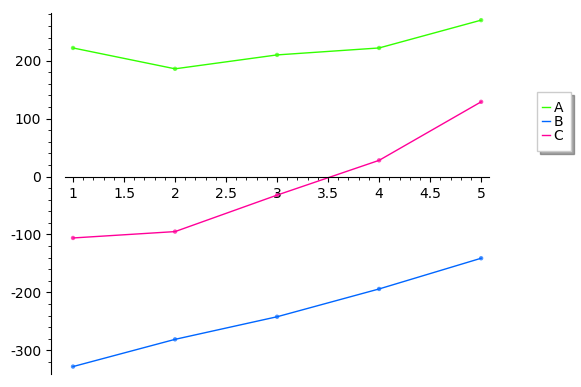

In [235]:
a = [(i+1, sum(A.T)[i]) for i in range(5)]
b = [(i+1, sum(B.T)[i]) for i in range(5)]
c = [(i+1, C[i]) for i in range(5)]
g = Graphics()
p1 = points(a, color=hue(0.3), alpha=0.7)
p2 = line2d(a, color=hue(0.3), legend_label='A')
p3 = points(b, color=hue(0.6), alpha=0.7)
p4 = line2d(b, color=hue(0.6), legend_label='B')
p5 = points(c, color=hue(0.9), alpha=0.7)
p6 = line2d(c, color=hue(0.9), legend_label='C')
g = g + p1 + p2 + p3 + p4 + p5 + p6
g.set_legend_options(bbox_to_anchor=(1.1, 0.1, 0.11, 0.7)) 
g.show()

### 4. Таблица данных 

| Класс | Имя | Описание (смысл, диапазон, точность) | Тип | Структура | Формат в/в |
| :-: | :-: | :-: | :-: | :-: | :-: |
| входные данные | fin | название текстового файла с элементами массива B | символ | строка | "+XX.txt" |
| входные данные | fout | название текстового файла с элементами массива B | символ | строка | "+XX.txt" |
| входные данные | A, B | исходные матрицы | цел | двумерные массивы | +XX (:5) |
| выходные данные | C | выводимый в текстовый файл сформированный массив | цел | одномерный массив | +XX (:5) |
| промежуточные данные | i | индекс текущей строки, 1≤i≤50 | цел | простая переменная | --- |
| промежуточные данные | j | индекс текущего столбца, 1≤j≤50 | цел | простая переменная | --- |

### 5. Входная форма
- обр 1.1 Исходная матрица A:
- обр 1.2 $ < A[11] >  < A[12] >  …  < A[1n] > \\ ... \\ < A[n1] >  < A[n2] >  …  < A[nn] >$    
- обр 2.1 Исходная матрица B:
- обр 2.2 $ < B[11] >  < B[12] >  …  < B[1n] > \\ ... \\ < B[n1] >  < B[n2] >  …  < B[nn] >$

### 6. Выходная форма
- обр 3 Лаб. 12 Типовой расчет
- обр 4.1 Исходная матрица A:
- обр 4.2 $ < A[11] >  < A[12] >  …  < A[1n] > \\ ... \\ < A[n1] >  < A[n2] >  …  < A[nn] >$    
- обр 5.1 Исходная матрица B:
- обр 5.2 $ < B[11] >  < B[12] >  …  < B[1n] > \\ ... \\ < B[n1] >  < B[n2] >  …  < B[nn] >$
- обр 6 Некорректное число строк или столбцов
- обр 7.1 Сформированный массив C:
- обр 7.2 $ < C[1] >  < C[2] >  …  < C[n] > $

### 7. Аномалии

| N | Описание | Условие возникновения | Реакция |
| :-: | :-: | :-: | :-: |
| 1 | Не входных данных | $A[i,j] = 0 \ \& \ B[i,j] = 0 \ \forall i,j$ | Обр 6 |
| 2 | Число строк A (или B) не равно числу столбцов | $i \neq j$ | Обр 6 |

### 8. Функциональные тесты

In [202]:
A1, B1 = read_txt('AB_SC_1.txt')
A2, B2 = read_txt('AB_SC_2.txt')
A3, B3 = read_txt('AB_SC_3.txt')
A4, B4 = read_txt('AB_SC_4.txt')
A5, B5 = read_txt('AB_SC_5.txt')

In [203]:
rows = [['Inputs', '-', '-', '-', 'Results', '-', 'Test'],
        ['fin(+.txt)', 'fout(+.txt)', 'A', 'B', 'C', 'Message', 'N'],
        ['AB_SC_1', 'ABC_SC_1', A1, B1, sum(A1.T) + sum(B1.T), '-', 1],
        ['AB_SC_2', 'ABC_SC_2', A2, B2, sum(A2.T) + sum(B2.T), '-', 2],
        ['AB_SC_3', 'ABC_SC_3', A3, B3, '-', 
         '$\exists (i,j): A[i,j] \leq B[i,j]$', 3],
        ['AB_SC_4', 'ABC_SC_4', A4, B4, sum(A4.T) + sum(B4.T), '-', 4],
        ['AB_SC_5', 'ABC_SC_5', A5, B5, '-', 
         '$\exists (i,j): A[i,j] \leq B[i,j]$', 5]]
table(rows, header_row=True, align='center')

Inputs,-,-,-,Results,-,Test
fin(+.txt),fout(+.txt),A,B,C,Message,N
AB_SC_1,ABC_SC_1,,,,-,
AB_SC_2,ABC_SC_2,,,,-,
AB_SC_3,ABC_SC_3,,,-,,
AB_SC_4,ABC_SC_4,,,,-,
AB_SC_5,ABC_SC_5,,,-,,


In [204]:
def sumAB(A, B):
    return [sum([A[i,j] + B[i,j] for j in range(A.nrows())]) for i in range(A.nrows())]

C = sumAB(A, B)
C

[-106, -95, -32, 28, 129]

In [205]:
rows = [['Test', 'Inputs', '-', '-', '-', 'Expected Results', '-'],
        ['N', 'fin(+.txt)', 'fout(+.txt)', 'A', 'B', 'C', 'Message'],
        [1, 'AB_SC_1', 'ABC_SC_1', A1, B1, sumAB(A1, B1), '-'],
        [2, 'AB_SC_2', 'ABC_SC_2', A2, B2, sumAB(A2, B2), '-'],
        [3, 'AB_SC_3', 'ABC_SC_3', A3, B3, '-', 
         '$\exists (i,j): A[i,j] \leq B[i,j]$'],
        [4, 'AB_SC_4', 'ABC_SC_4', A4, B4, sumAB(A4, B4), '-'],
        [5, 'AB_SC_5', 'ABC_SC_5', A5, B5, '-', 
         '$\exists (i,j): A[i,j] \leq B[i,j]$']]
table(rows, header_row=True, align='center')

Test,Inputs,-,-,-,Expected Results,-
N,fin(+.txt),fout(+.txt),A,B,C,Message
,AB_SC_1,ABC_SC_1,,,,-
,AB_SC_2,ABC_SC_2,,,,-
,AB_SC_3,ABC_SC_3,,,-,
,AB_SC_4,ABC_SC_4,,,,-
,AB_SC_5,ABC_SC_5,,,-,


| - | Результаты | № теста |
| :-: | :-: | :-: |
| - | - | - |
| C | Максимальная вычислительная нагрузка = 25 (сравнения) + 5 (суммирование) | 1 |
| - | Соответствует ожидаемым числовым значениям | - |
| C | Максимальная вычислительная нагрузка = 25 (сравнения) + 5 (суммирование) | 2 |
| - | Соответствует ожидаемым числовым значениям | - |
| C | - | 3 |
| - | Задача не решалась, массивы не соответствуют условиям | - |
| C | Максимальная вычислительная нагрузка = 25 (сравнения) + 5 (суммирование) | 4 |
| - | Соответствует ожидаемым числовым значениям | - |
| C | - | 5 |
| - | Задача не решалась, массивы не соответствуют условиям | - |
| - | - | - |
| Сообщение | - | 1 |
| Сообщение | - | 2 |
| Сообщение | Не все элементы матрицы A больше соответствующих элементов матрицы B | 3 |
| Сообщение | - | 4 |
| Сообщение | Не все элементы матрицы A больше соответствующих элементов матрицы B | 5 |

### 9. Метод
Отделим ввод-вывод от обработки данных и разделим задачу на три подзадачи:

1. _Подзадача А 0.1._ 

    Запросить названия текстовых файлов ввода-вывода, считать из текстового файла ввода исходные данные (обр.1-2), затем вывести их на экран (обр.3-5) для визуального подтверждения.

    Вывести сообщение о наличии некорректных данных, если задача не решена (обр.6).

2. _Подзадача А 0.2._ Решение поставленной задачи: 

   - 2.1. На основе введенных исходных данных ($A, B$) определить, каждый ли элемент матрицы $A$ больше соответствующего элемента матрицы $B$.

   - 2.2. Если условие 2.1 выполнено, то сформировать новый массив $C$ по правилу $(*)$.
   
3. _Подзадача А 0.3._ 

   Ввести полученные результаты ($C$) на экран (обр.7.1, 7.2) и записать в файл вывода исходные матрицы и полученный результат. 

Ввод-вывод тривиален и представляет собой чисто техническую задачу. 

Для осуществления процесса ввода-вывода и обработки матриц потребуются промежуточные переменные: 

- `i` – индекс строки текущего элемента матрицы, 

- `j` - индекс столбца текущего элемента матрицы.

Их следует добавить в таблицу данных. 

Алгоритм необходим только для обработка входных данных и расчета результата. 

### 10. Алгоритм

[Sample diagrams](http://blockdiag.com/en/blockdiag/examples.html#sample-diagrams)

In [252]:
%%file block_diagram

blockdiag {
    orientation = portrait;
    class start_end [shape = ellipse, fontsize = 15, color = lightskyblue];
    class input_out [shape = flowchart.input, fontsize = 15, width = 600, color = lightgray];
    class main_box [shape = box, width = 500, height = 150, fontsize = 20];
    
    Начало -> 
    "Вывод заголовка по обр.4 на экран" -> "Ввод имен файлов по обр.1.1,1.2" ->
    "Вывод имен файлов по обр.5.1,5.2 на экран" ->
    "Функция 1. \nСохранение исходных данных \nв виде матрицы X" ->
    "Функция 2. \nВывод на экран и в файл \nматриц A,B" ->   
    "\nСравнение \nэлементов матриц A,B \nФормирование \nмассива C" ->
    "Функция 3. \nВывод на экран и в файл \nA, B, C" ->
    Конец;

    Начало, Конец [class = "start_end"];
    "Вывод заголовка по обр.4 на экран", "Ввод имен файлов по обр.1.1,1.2" [class = "input_out"];
    "Вывод имен файлов по обр.5.1,5.2 на экран" [class = "input_out"];
    "Функция 1. \nСохранение исходных данных \nв виде матрицы X" [class = "main_box"];
    "Функция 2. \nВывод на экран и в файл \nматриц A,B" [class = "main_box"];
    "\nСравнение \nэлементов матриц A,B \nФормирование \nмассива C" [class = "main_box"];
    "Функция 3. \nВывод на экран и в файл \nA, B, C" [class = "main_box"];
    
    "Вывод имен файлов по обр.5.1,5.2 на экран" -> 
    "Функция 1. \nСохранение исходных данных \nв виде матрицы X" [label = 'Вх. A,B', fontsize = 18, textcolor = blue];
    "Функция 3. \nВывод на экран и в файл \nA, B, C" ->
    Конец [label = 'Вых. C', fontsize = 18, textcolor = red];
}

Overwriting block_diagram


In [253]:
!blockdiag block_diagram

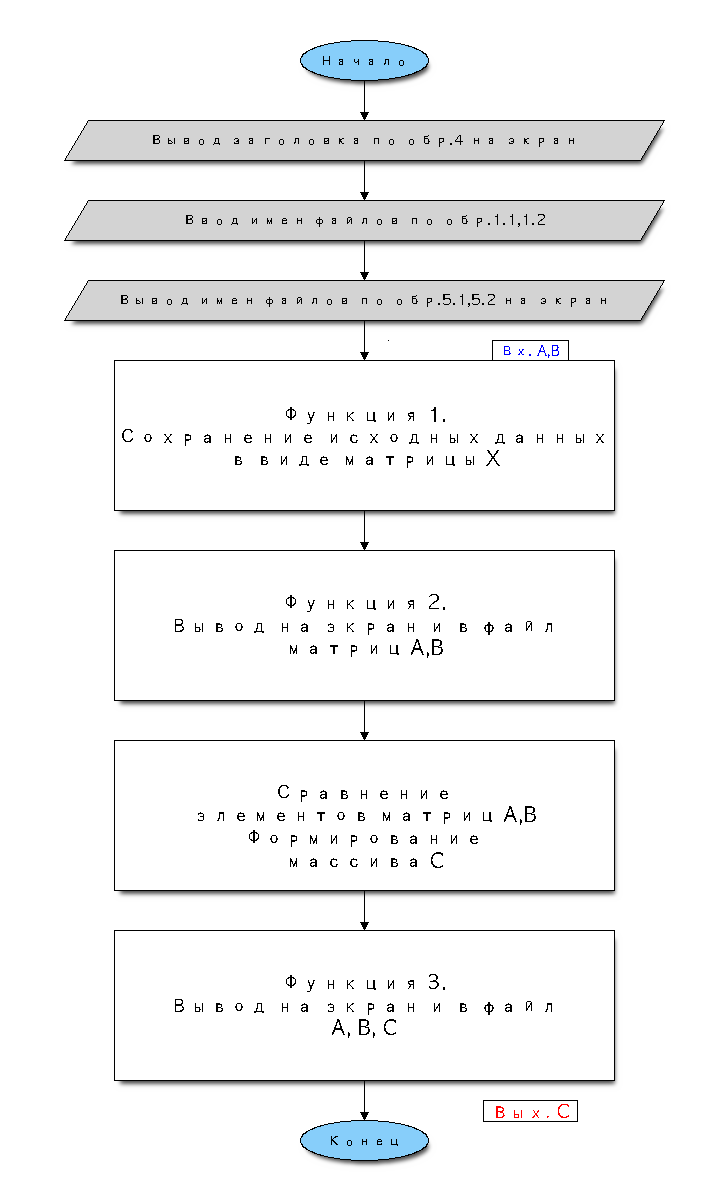

In [254]:
from IPython.display import Image
Image("block_diagram.png")

### 11. Программа на <i style="color:##3636ff;">R</i>. 

__Диалоговый вариант {ввод названий файлов и данных из текстового файла, вывод на экран и в текстовый файл}__

Синтаксис:

[R Tutorial](https://www.tutorialspoint.com/r/index.htm)

In [237]:
%%r
read_in_txt <- function(fin) {
  X <- read.csv(fin, header=F, sep=' ')
  X[,1] <- as.integer(gsub("\\[", "", X[,1]))
  X[,length(X)] <- as.integer(gsub("\\]", "", X[,length(X)]))
  colnames(X) <- c(1:length(X))
  return(X)
}

print_out_matrix <- function(m){
        write.table(format(m, justify="centre"), 
                    row.names=F, col.names=F, quote=F)
}

write_out_txt <- function(fout, X, C) {
    s <- vector(length=2*length(X)+1)
    for (i in 1:(2*length(X)+1)) {
        s[i] <- paste('[', toString(rbind(X, C)[i,]))
        s[i] <- paste(s[i], ']')
        s[i] <- gsub(",", "", s[i])
    }
    writeLines(s, fout)
}

In [248]:
%%r
cat(strrep(' ', 20), 'Лаб.12 Типовой Расчет \n') 
fin <- 'AB_SC_0.txt'
fout <- 'ABC_SC_0.txt'

cat('\nТекстовый файл с элементами исходных матриц: \n')
print(fin)
cat('\nТекстовый файл с элементами исходных матриц и результатами: \n')
print(fout)

X <- read_in_txt(fin)
A <- X[1:length(X), 1:length(X)]
B <- X[(length(X)+1):(2*length(X)),1:length(X)]
rownames(B) <- c(1:length(X))

cat(strrep('*', 60), '\nИсходная матрица A: \n')
cat(strrep('*', 60), '\n')
print_out_matrix(A)
cat(strrep('*', 60), '\nИсходная матрица B: \n')
cat(strrep('*', 60), '\n')
print_out_matrix(B)

if ((sum(is.na(A)) != 0) | (sum(is.na(B)) != 0)) {
    print('Некорректное число строк или столбцов')
} else {
    if (sum(A > B) == length(A) ** 2) {
        C <- rowSums(A) + rowSums(B)
        cat(strrep('*', 60), '\nСформированный массив C: \n')
        cat(strrep('*', 60), '\n')
        print_out_matrix(t(C))
    } else {
        print('Не все элементы матрицы A больше соответствующих элементов матрицы B')
    }
}

write_out_txt(fout, X, C)

                     Лаб.12 Типовой Расчет 



Текстовый файл с элементами исходных матриц: 
[1] "AB_SC_0.txt"

Текстовый файл с элементами исходных матриц и результатами: 
[1] "ABC_SC_0.txt"




************************************************************ 
Исходная матрица A: 
************************************************************ 
41 82 20 64 15
42 19  3 30 92
39 43 53 30 45
26 86 38 18 54
41 75 88 37 29
************************************************************ 
Исходная матрица B: 
************************************************************ 
-11 -78 -66 -95 -78
-69  -5 -51 -68 -88
-60 -56 -17 -10 -99
-12 -30 -76 -32 -44
 -7 -77 -44 -10  -3











************************************************************ 
Сформированный массив C: 
************************************************************ 
-106  -95  -32   28  129

